# 气象数据分析

In [176]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn
import json
import requests
from pandas.io.json import json_normalize
import datetime
from matplotlib import dates as mdates

In [3]:
city = pd.read_json('/home/jakey/下载/city.list.json')

In [48]:
city[city.name.isin(['Shanghai','Nanjing','Zhumadian','Changde','Nanchong','Shiyan','Luoyang','Xian','Chengdu','Qiongxi'])]

,coord,country,id,name
5567,"{'lon': 121.458061, 'lat': 31.222219}",CN,1796236,Shanghai
5569,"{'lon': 118.681107, 'lat': 24.962219}",CN,1801797,Luoyang
30898,"{'lon': 108.928612, 'lat': 34.258331}",CN,1790630,Xian
42594,"{'lon': 104.066673, 'lat': 30.66667}",CN,1815286,Chengdu
42597,"{'lon': 118.777779, 'lat': 32.061668}",CN,1799962,Nanjing
42659,"{'lon': 112.453613, 'lat': 34.683609}",CN,1801792,Luoyang
42732,"{'lon': 114.029442, 'lat': 32.979439}",CN,1783873,Zhumadian
42820,"{'lon': 110.783333, 'lat': 32.566669}",CN,1794904,Shiyan
110134,"{'lon': 111.678299, 'lat': 29.046379}",CN,1791121,Changde
110167,"{'lon': 110.778061, 'lat': 32.647499}",CN,1794903,Shiyan


In [252]:
shanghai = requests.get('http://api.openweathermap.org/data/2.5/forecast?id=1796236&APPID=f217c39f65c3d00113697b73eb6be835').text
shanghai = json_normalize(json.loads(shanghai),'list')
luoyang = requests.get('http://api.openweathermap.org/data/2.5/forecast?id=1801797&APPID=f217c39f65c3d00113697b73eb6be835').text
luoyang = json_normalize(json.loads(luoyang),'list')
xian = requests.get('http://api.openweathermap.org/data/2.5/forecast?id=1790630&APPID=f217c39f65c3d00113697b73eb6be835').text
xian = json_normalize(json.loads(xian),'list')
chengdu = requests.get('http://api.openweathermap.org/data/2.5/forecast?id=1815286&APPID=f217c39f65c3d00113697b73eb6be835').text
chengdu = json_normalize(json.loads(chengdu),'list')
nanjing = requests.get('http://api.openweathermap.org/data/2.5/forecast?id=1799962&APPID=f217c39f65c3d00113697b73eb6be835').text
nanjing = json_normalize(json.loads(nanjing),'list')
zhumadian = requests.get('http://api.openweathermap.org/data/2.5/forecast?id=1783873&APPID=f217c39f65c3d00113697b73eb6be835').text
zhumadian = json_normalize(json.loads(zhumadian),'list')
shiyan = requests.get('http://api.openweathermap.org/data/2.5/forecast?id=1794904&APPID=f217c39f65c3d00113697b73eb6be835').text
shiyan = json_normalize(json.loads(shiyan),'list')
changde = requests.get('http://api.openweathermap.org/data/2.5/forecast?id=1791121&APPID=f217c39f65c3d00113697b73eb6be835').text
changde = json_normalize(json.loads(changde),'list')
nanchong = requests.get('http://api.openweathermap.org/data/2.5/forecast?id=1800146&APPID=f217c39f65c3d00113697b73eb6be835').text
nanchong = json_normalize(json.loads(nanchong),'list')
qiongxi = requests.get('http://api.openweathermap.org/data/2.5/forecast?id=1797537&APPID=f217c39f65c3d00113697b73eb6be835').text
qiongxi = json_normalize(json.loads(qiongxi),'list')

In [166]:
def prepare(city1,city_name):
    temp = []
    humidity = []
    pressure = []
    description = []
    dt = []
    wind_deg = []
    wind_speed = []
    city = []
    for i in range(city1.shape[0]):
        temp.append(city1.iloc[i]['main']['temp']-273.15)
        humidity.append(city1.iloc[i]['main']['humidity'])
        pressure.append(city1.iloc[i]['main']['pressure'])
        description.append(city1.iloc[i]['weather'][0]['description'])
        wind_deg.append(city1.iloc[i]['wind']['deg'])
        dt.append(city1.iloc[i]['dt'])
        wind_speed.append(city1.iloc[i]['wind']['speed'])
        city.append(city_name)
    headings = ['city','day','temp','humidity','pressure','description','wind_speed','wind_deg']
    data = [city,dt,temp,humidity,pressure,description,wind_speed,wind_deg]
    df = pd.DataFrame(data,index=headings)
    df = df.T
    df['day'] = df['day'].apply(datetime.datetime.fromtimestamp)
    return df

In [253]:
shanghai = prepare(shanghai,'上海')
luoyang = prepare(luoyang,'洛阳')
xian = prepare(xian,'西安')
chengdu = prepare(chengdu,'成都')
nanjing = prepare(nanjing,'南京')
zhumadian = prepare(zhumadian,'驻马店')
shiyan = prepare(shiyan,'十堰')
changde = prepare(changde,'常德')
nanchong = prepare(nanchong,'南充')
qiongxi = prepare(qiongxi,'邛溪')

In [254]:
shanghai['dist'] = 0
luoyang['dist'] = 925
xian['dist'] = 1242
chengdu['dist'] = 1660 
nanjing['dist'] = 271
zhumadian['dist'] = 727
shiyan['dist'] = 1019
changde['dist'] = 972
nanchong['dist'] = 1466
qiongxi['dist'] = 1792

In [175]:
# shanghai.to_csv('/home/jakey/文档/city/shanghai.csv',index=False)
# luoyang.to_csv('/home/jakey/文档/city/luoyang.csv',index=False)
# xian.to_csv('/home/jakey/文档/city/xian.csv',index=False)
# chengdu.to_csv('/home/jakey/文档/city/chengdu.csv',index=False)
# nanjing.to_csv('/home/jakey/文档/city/nanjing.csv',index=False)
# zhumadian.to_csv('/home/jakey/文档/city/zhumadian.csv',index=False)
# shiyan.to_csv('/home/jakey/文档/city/shiyan.csv',index=False)
# chengde.to_csv('/home/jakey/文档/city/chengde.csv',index=False)
#qiongxi.to_csv('/home/jakey/文档/city/qiongxi.csv',index=False)
# nanchong.to_csv('/home/jakey/文档/city/nanchong.csv',index=False)

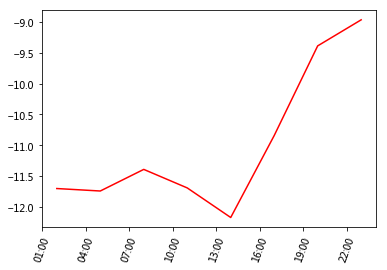

In [224]:
x1 = shanghai.set_index('day').truncate(after = pd.Timestamp('2017-02-01')).index
y1 = shanghai.set_index('day').truncate(after = pd.Timestamp('2017-02-01'))['temp']
fig, ax = plt.subplots()
plt.xticks(rotation=70)
hours = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(hours)
ax.plot(x1,y1,c='r')

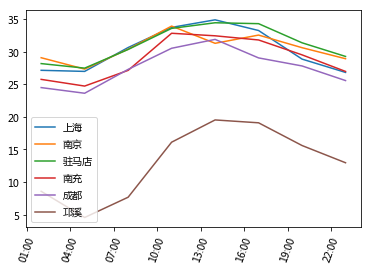

In [266]:
x1 = shanghai.set_index('day').truncate(before = pd.Timestamp('2018-08-07'),after = pd.Timestamp('2018-08-08')).index
y1 = shanghai.set_index('day').truncate(before = pd.Timestamp('2018-08-07'),after = pd.Timestamp('2018-08-08'))['temp']
x2 = nanjing.set_index('day').truncate(before = pd.Timestamp('2018-08-07'),after = pd.Timestamp('2018-08-08')).index
y2 = nanjing.set_index('day').truncate(before = pd.Timestamp('2018-08-07'),after = pd.Timestamp('2018-08-08'))['temp']
x3 = zhumadian.set_index('day').truncate(before = pd.Timestamp('2018-08-07'),after = pd.Timestamp('2018-08-08')).index
y3 = zhumadian.set_index('day').truncate(before = pd.Timestamp('2018-08-07'),after = pd.Timestamp('2018-08-08'))['temp']
x4 = nanchong.set_index('day').truncate(before = pd.Timestamp('2018-08-07'),after = pd.Timestamp('2018-08-08')).index
y4 = nanchong.set_index('day').truncate(before = pd.Timestamp('2018-08-07'),after = pd.Timestamp('2018-08-08'))['temp']
x5 = chengdu.set_index('day').truncate(before = pd.Timestamp('2018-08-07'),after = pd.Timestamp('2018-08-08')).index
y5 = chengdu.set_index('day').truncate(before = pd.Timestamp('2018-08-07'),after = pd.Timestamp('2018-08-08'))['temp']
x6 = qiongxi.set_index('day').truncate(before = pd.Timestamp('2018-08-07'),after = pd.Timestamp('2018-08-08')).index
y6 = qiongxi.set_index('day').truncate(before = pd.Timestamp('2018-08-07'),after = pd.Timestamp('2018-08-08'))['temp']
fig, ax = plt.subplots()
plt.xticks(rotation=70)
hours = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(hours)
plt.plot(x1,y1,x2,y2,x3,y3)
plt.plot(x4,y4,x5,y5,x6,y6)
plt.legend(['上海','南京','驻马店','南充','成都','邛溪'])
#沿海越近越热

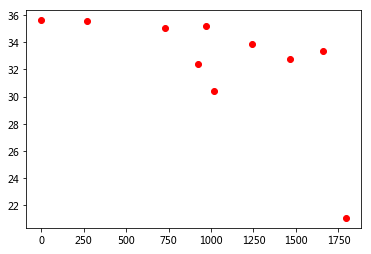

In [269]:
dist = [shanghai['dist'][0],luoyang['dist'][0],
        xian['dist'][0],chengdu['dist'][0], 
        nanjing['dist'][0],zhumadian['dist'][0],
        shiyan['dist'][0],changde['dist'][0],
        nanchong['dist'][0],qiongxi['dist'][0]]
temp_max = [shanghai['temp'].max(),luoyang['temp'].max(),
           xian['temp'].max(),chengdu['temp'].max(),
           nanjing['temp'].max(),zhumadian['temp'].max(),
           shiyan['temp'].max(),changde['temp'].max(),
           nanchong['temp'].max(),qiongxi['temp'].max()]
temp_min = [shanghai['temp'].min(),luoyang['temp'].min(),
           xian['temp'].min(),chengdu['temp'].min(),
           nanjing['temp'].min(),zhumadian['temp'].min(),
           shiyan['temp'].min(),changde['temp'].min(),
           nanchong['temp'].min(),qiongxi['temp'].min()]
plt.plot(dist,temp_max,'ro')

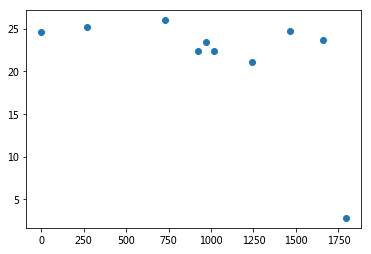

In [272]:
plt.scatter(dist,temp_min)

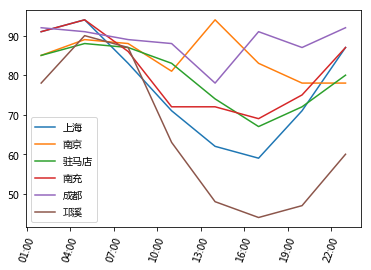

In [275]:
x1 = shanghai.set_index('day').truncate(before = pd.Timestamp('2018-08-07'),after = pd.Timestamp('2018-08-08')).index
y1 = shanghai.set_index('day').truncate(before = pd.Timestamp('2018-08-07'),after = pd.Timestamp('2018-08-08'))['humidity']
x2 = nanjing.set_index('day').truncate(before = pd.Timestamp('2018-08-07'),after = pd.Timestamp('2018-08-08')).index
y2 = nanjing.set_index('day').truncate(before = pd.Timestamp('2018-08-07'),after = pd.Timestamp('2018-08-08'))['humidity']
x3 = zhumadian.set_index('day').truncate(before = pd.Timestamp('2018-08-07'),after = pd.Timestamp('2018-08-08')).index
y3 = zhumadian.set_index('day').truncate(before = pd.Timestamp('2018-08-07'),after = pd.Timestamp('2018-08-08'))['humidity']
x4 = nanchong.set_index('day').truncate(before = pd.Timestamp('2018-08-07'),after = pd.Timestamp('2018-08-08')).index
y4 = nanchong.set_index('day').truncate(before = pd.Timestamp('2018-08-07'),after = pd.Timestamp('2018-08-08'))['humidity']
x5 = chengdu.set_index('day').truncate(before = pd.Timestamp('2018-08-07'),after = pd.Timestamp('2018-08-08')).index
y5 = chengdu.set_index('day').truncate(before = pd.Timestamp('2018-08-07'),after = pd.Timestamp('2018-08-08'))['humidity']
x6 = qiongxi.set_index('day').truncate(before = pd.Timestamp('2018-08-07'),after = pd.Timestamp('2018-08-08')).index
y6 = qiongxi.set_index('day').truncate(before = pd.Timestamp('2018-08-07'),after = pd.Timestamp('2018-08-08'))['humidity']
fig, ax = plt.subplots()
plt.xticks(rotation=70)
hours = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(hours)
plt.plot(x1,y1,x2,y2,x3,y3)
plt.plot(x4,y4,x5,y5,x6,y6)
plt.legend(['上海','南京','驻马店','南充','成都','邛溪'])

# 瞎掰